# Employee Attrition Prediction

### Importing necessary libraries and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
sns.set('notebook')

In [3]:
data = pd.read_csv("Employee.csv")
data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,22,Associate Degree,Married,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,No,21,Master’s Degree,Divorced,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,11,Bachelor’s Degree,Married,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,No,27,High School,Single,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,Yes,71,High School,Divorced,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,Yes,40,Associate Degree,Single,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,Yes,45,Master’s Degree,Married,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,No,4,Associate Degree,Married,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,No,13,Bachelor’s Degree,Divorced,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


### Data Understanding

In [4]:
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,22,Associate Degree,Married,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,No,21,Master’s Degree,Divorced,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,11,Bachelor’s Degree,Married,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,No,27,High School,Single,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,Yes,71,High School,Divorced,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [5]:
data.shape

(74498, 24)

Data has 74498 rows and 24 columns

In [6]:
data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [7]:
data.dtypes

Employee ID                   int64
Age                           int64
Gender                       object
Years at Company              int64
Job Role                     object
Monthly Income                int64
Work-Life Balance            object
Job Satisfaction             object
Performance Rating           object
Number of Promotions        float64
Overtime                     object
Distance from Home            int64
Education Level              object
Marital Status               object
Number of Dependents        float64
Job Level                    object
Company Size                 object
Company Tenure                int64
Remote Work                  object
Leadership Opportunities     object
Innovation Opportunities     object
Company Reputation           object
Employee Recognition         object
Attrition                    object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [9]:
data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [10]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
74493    False
74494    False
74495    False
74496    False
74497    False
Length: 74498, dtype: bool

In [11]:
data.duplicated().value_counts()

False    74498
dtype: int64

There are no duplicate columns

### Handling missing values

In [12]:
data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

We can see that there are missing values in the columns Work-Life Balance(4), Number of Promotions(5),Education Level(5), Marital Status(4), Number of Dependents(6),Job Level(5),Company Size(2), Remote Work(3) and Employee Recognition(2)       

In [13]:
# Handle missing values
# Fill missing numerical values with the median
num = ['Number of Promotions', 'Number of Dependents']
for col in num:
    data[col].fillna(data[col].median(), inplace=True)

# Filling missing categorical values with the mode
cat = ['Work-Life Balance', 'Performance Rating', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Employee Recognition']
for col in cat:
    data[col].fillna(data[col].mode()[0], inplace=True)


In [14]:
data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

### Exploratory Data Analysis

In [15]:
data.nunique()

Employee ID                 74498
Age                            42
Gender                          2
Years at Company               51
Job Role                        5
Monthly Income               9842
Work-Life Balance               4
Job Satisfaction                4
Performance Rating              4
Number of Promotions            5
Overtime                        2
Distance from Home             99
Education Level                 5
Marital Status                  3
Number of Dependents            7
Job Level                       3
Company Size                    3
Company Tenure                127
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Company Reputation              4
Employee Recognition            4
Attrition                       2
dtype: int64

In the given dataset we have two types of employees, those who stayed and those who left.

In [16]:
attr_count=pd.DataFrame(data["Attrition"].value_counts())

In [17]:
attr_count

,Attrition
Stayed,39128
Left,35370


#### Distribution of attrition

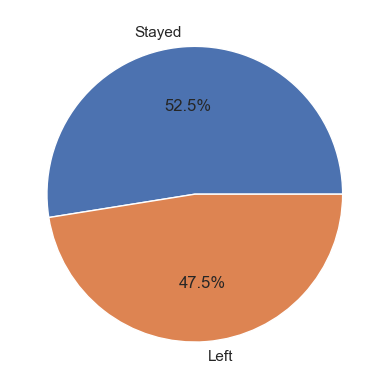

In [24]:
plt.pie(attr_count["Attrition"],labels=['Stayed','Left'],autopct='%.1f%%')
plt.show()

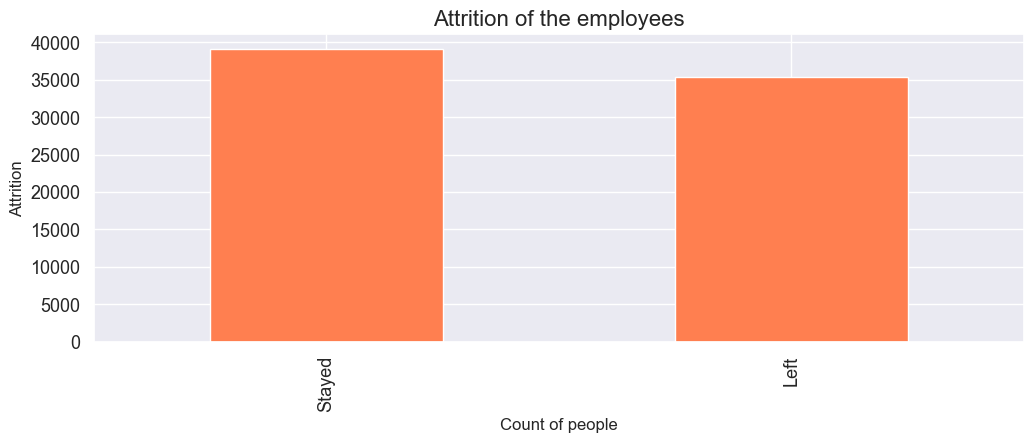

In [27]:
data['Attrition'].value_counts().plot(kind='bar', figsize=(12,4), color="coral", fontsize=13)

plt.xlabel("Count of people", fontsize=12)
plt.ylabel("Attrition", fontsize=12)
plt.title("Attrition of the employees", fontsize=16)
plt.show()

#### Age and Attrition

Text(0.5, 1.0, 'Histogram of Age')

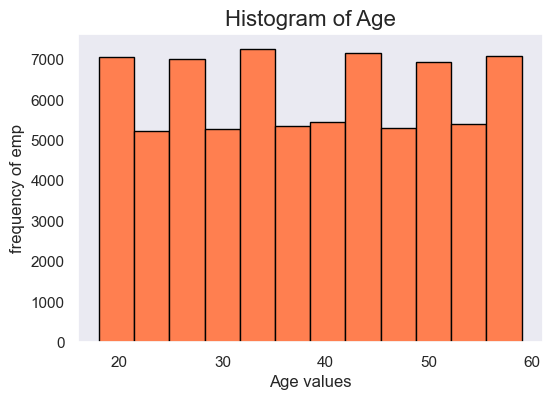

In [33]:
data.hist(column="Age", grid=False, figsize=(6,4), color="coral",edgecolor="black",bins=12)

plt.xlabel("Age values",fontsize=12)
plt.ylabel("frequency of emp",fontsize=12)
plt.title("Histogram of Age",fontsize=16)

Employees age range from 20 to 60 years.


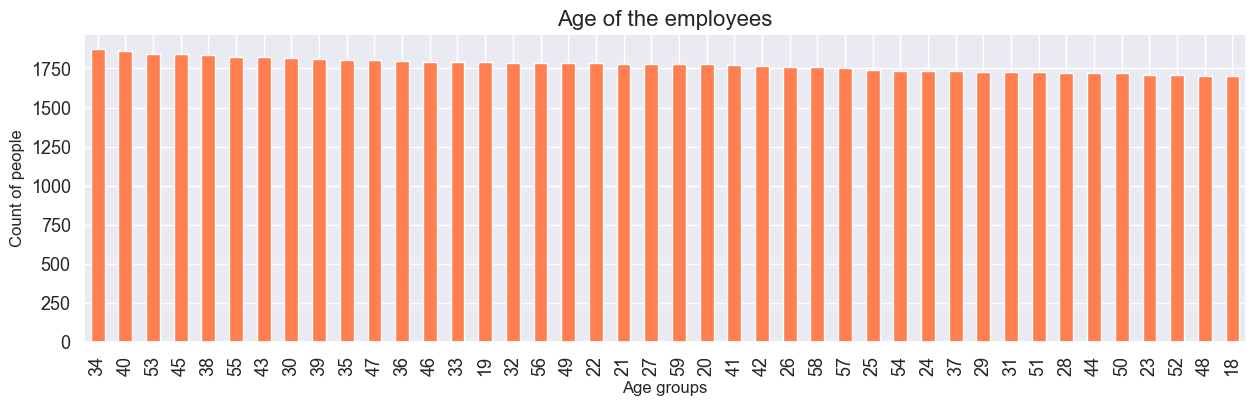

In [34]:
data['Age'].value_counts().plot(kind='bar', figsize=(15,4), color="coral", fontsize=13)

plt.xlabel("Age groups", fontsize=12)
plt.ylabel("Count of people", fontsize=12)
plt.title("Age of the employees", fontsize=16)
plt.show()

We can see that the employee counts are almost similar in all age groups.

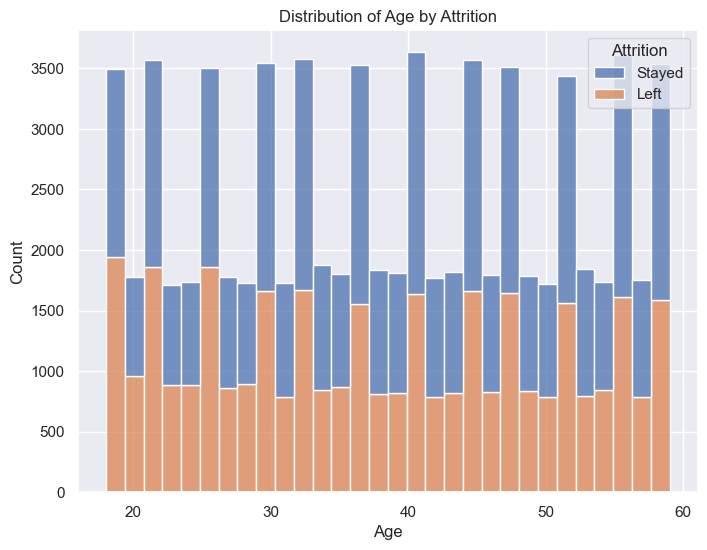

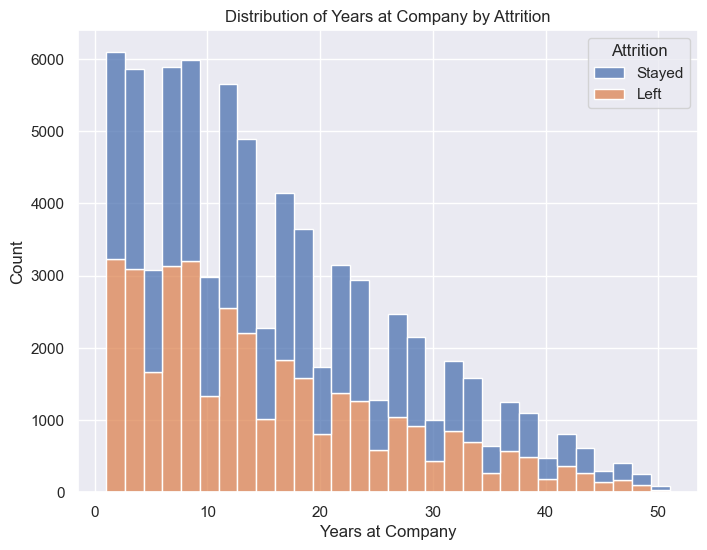

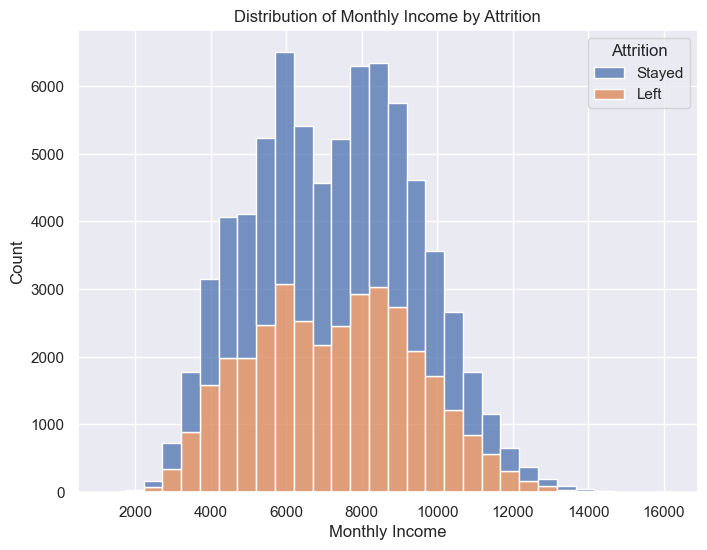

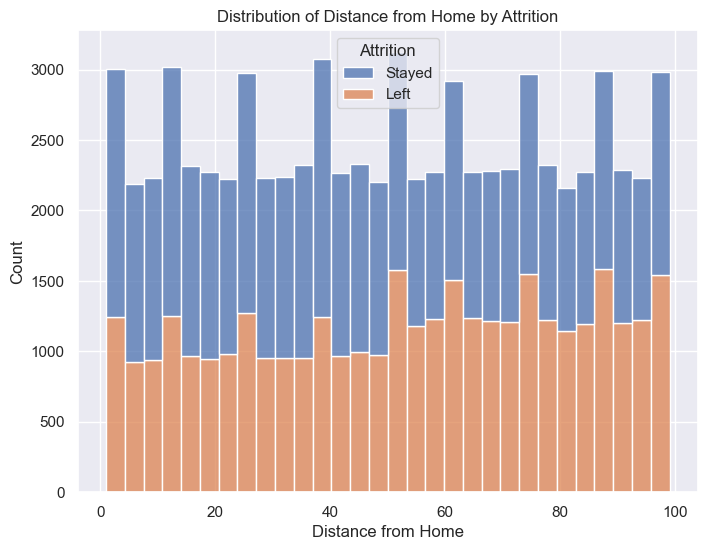

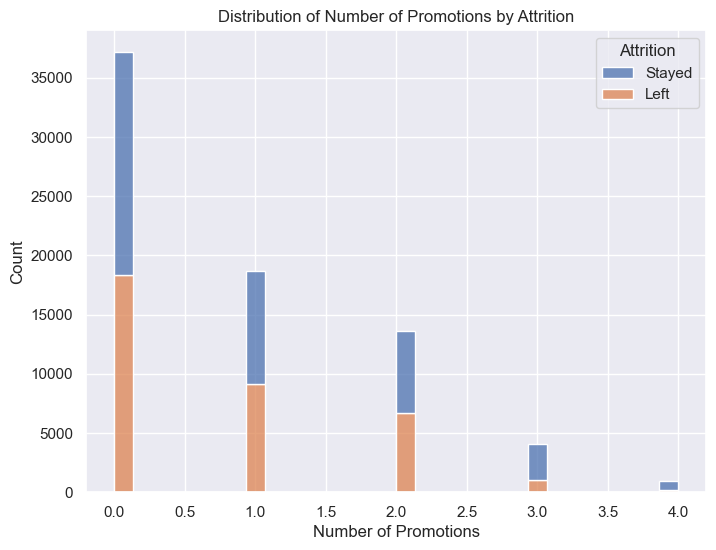

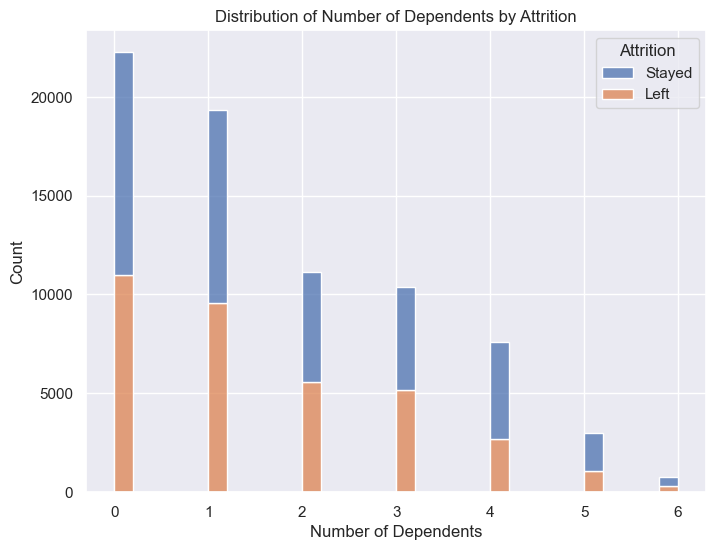

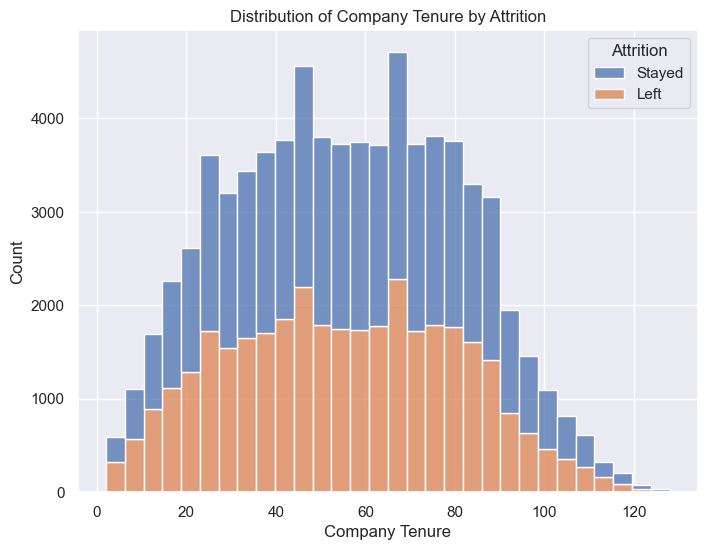

In [46]:
num_col = ['Age', 'Years at Company', 'Monthly Income', 'Distance from Home', 'Number of Promotions', 'Number of Dependents', 'Company Tenure']
for col in num_col:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=col, hue='Attrition', multiple='stack', bins=30)
    plt.title(f'Distribution of {col} by Attrition')
    plt.show()

The attrition rate appears fairly consistent across different age groups.
A larger proportion of employees in each age group stayed compared to those who left.Age does not seem to be a strong factor influencing attrition

Employees who have been with the company for fewer years (0-10 years) have a higher attrition rate.
The number of employees who stayed is higher than those who left across all tenure categories.
As the number of years at the company increases, the count of employees decreases, but the ratio of those who stayed versus those who left remains relatively consistent.

The distribution of monthly income for employees who stayed versus those who left is relatively similar.Monthly income does not appear to be a significant differentiating factor in predicting attrition by itself, as both groups (stayed and left) show similar distributions.

Diatance from home and Company tenure does not appear to be a significant differentiating factor in predicting attrition as both groups (stayed and left) show similar distributions.

Employees with no or one dependent have higher attrition rates compared to those with more dependents.
The majority of employees who received promotions stayed, with those receiving no promotions having higher attrition rates.

### Outlier Handling

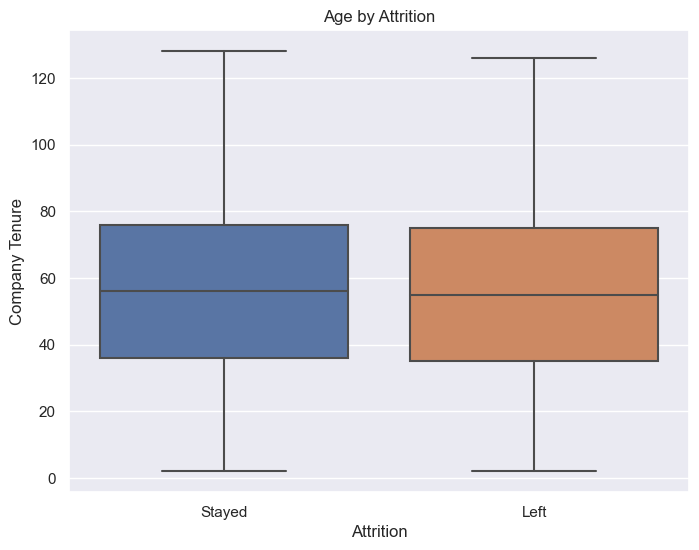

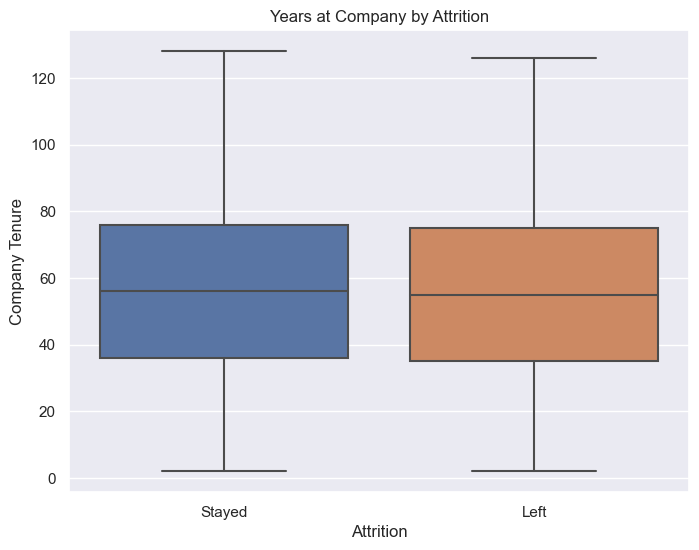

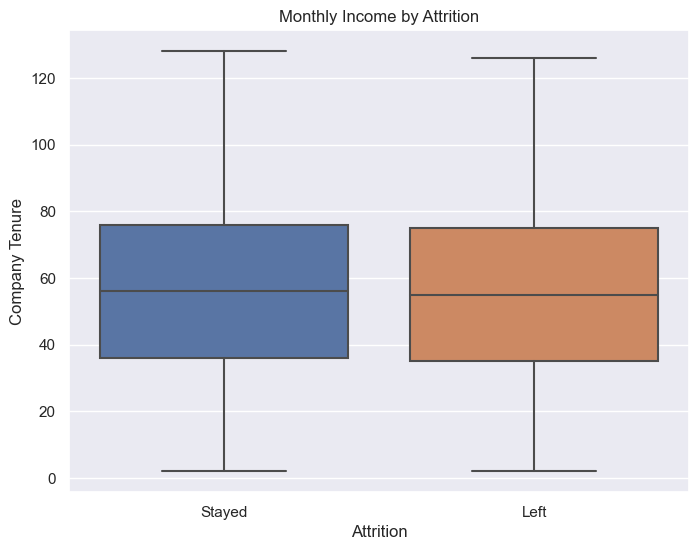

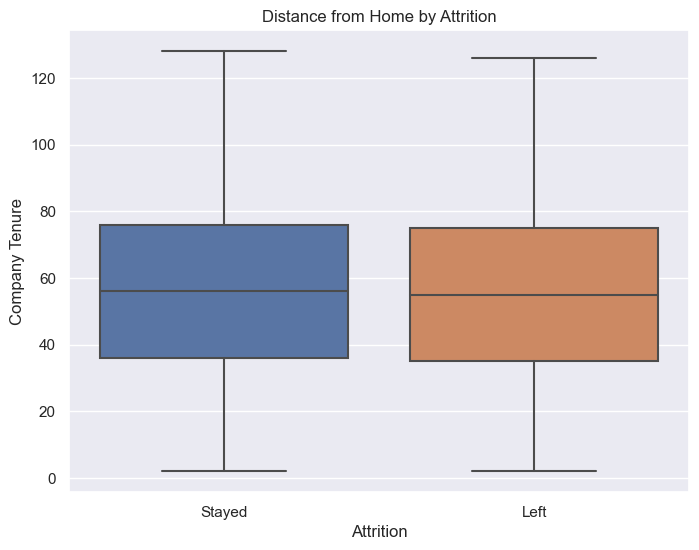

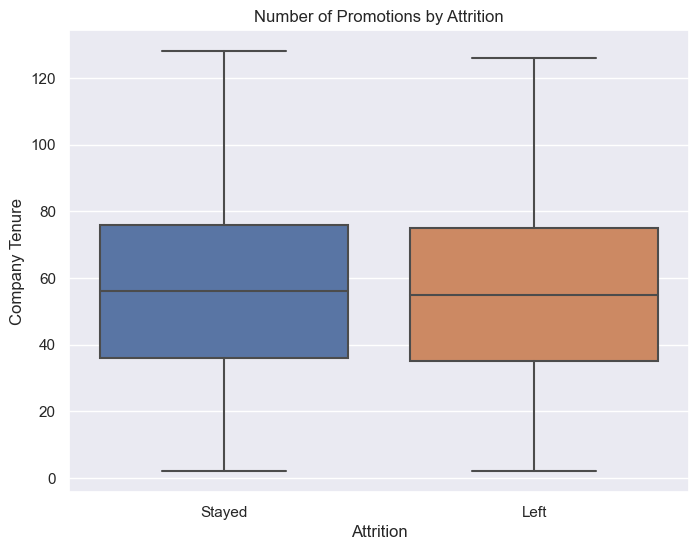

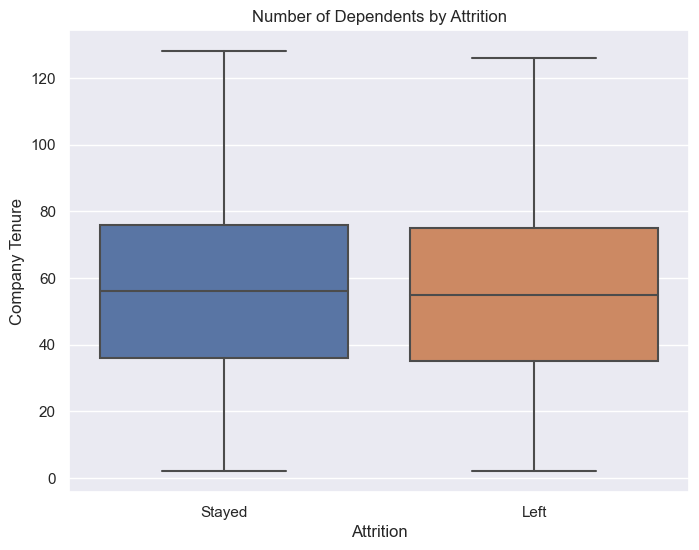

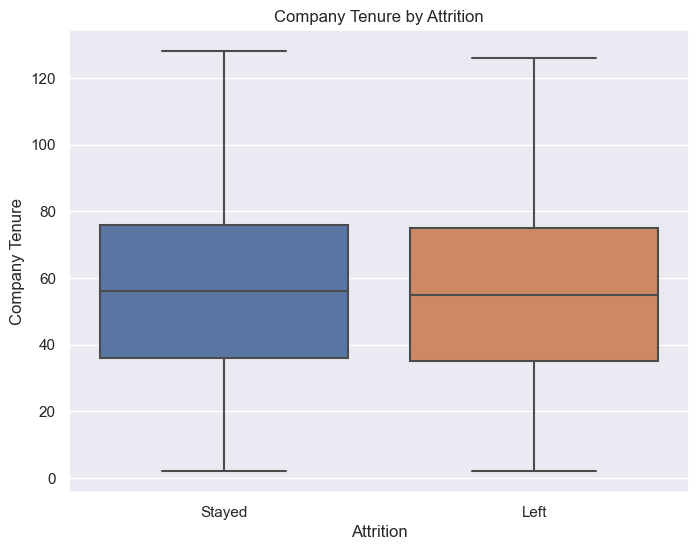

In [39]:
for col in num_col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Attrition', y=feature, data=data)
    plt.title(f'{col} by Attrition')
    plt.show()

We can see that there are no outliers in the data

In [42]:
cat_col = data.select_dtypes(include=['object']).columns
cat_col

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

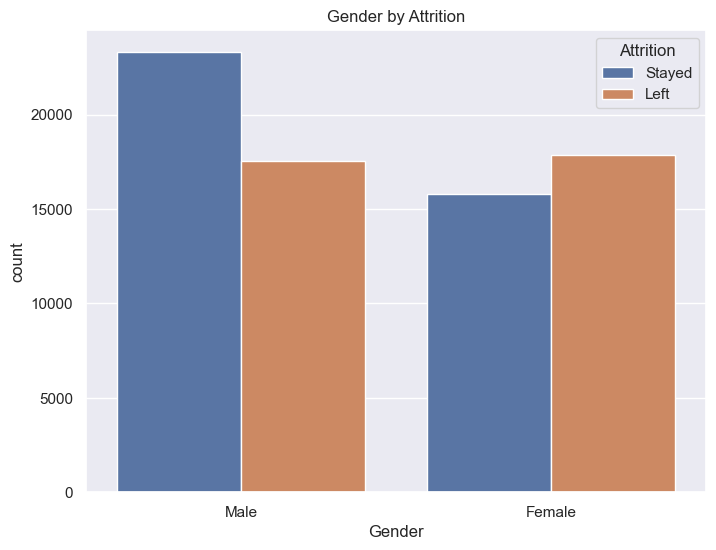

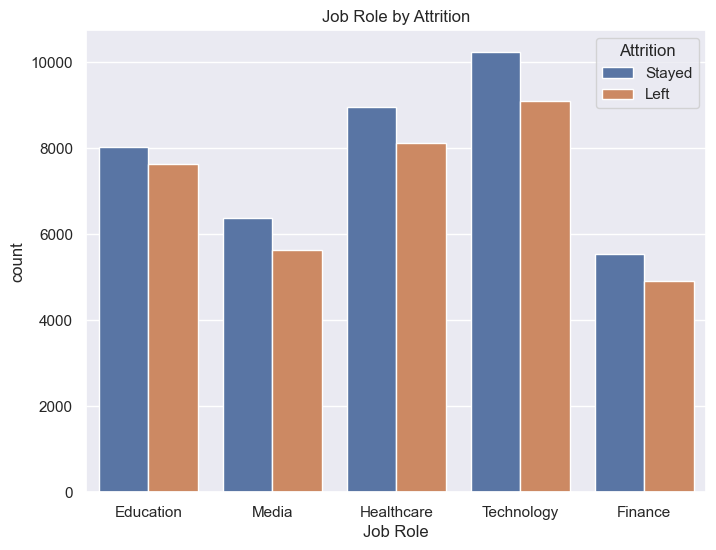

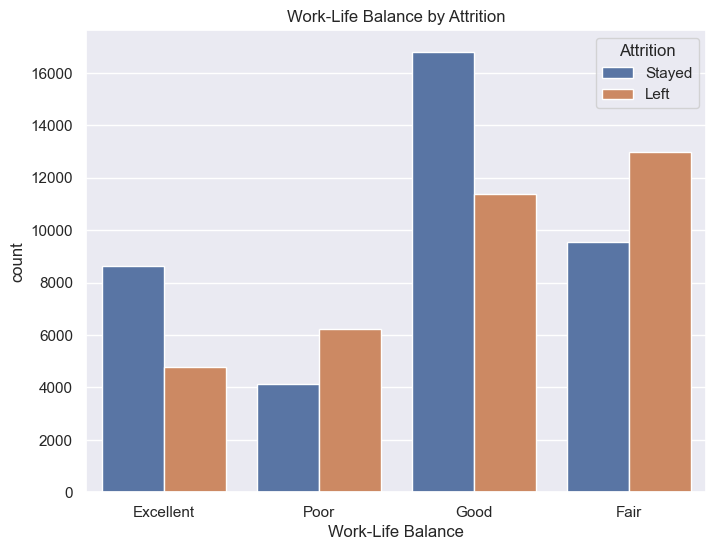

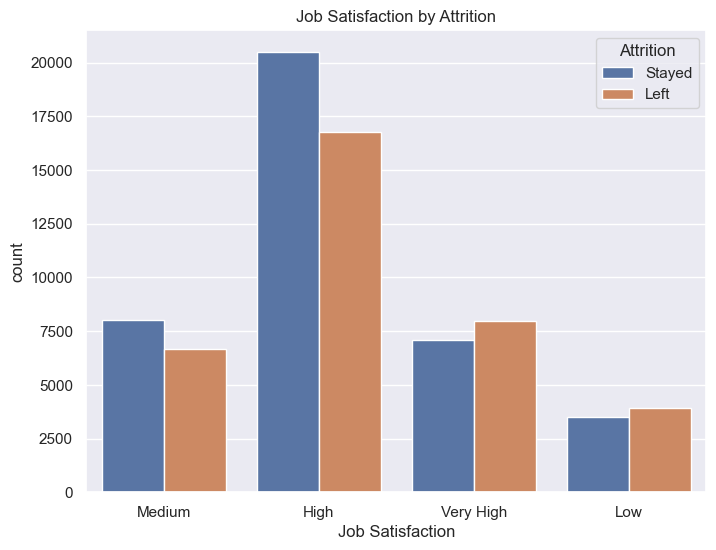

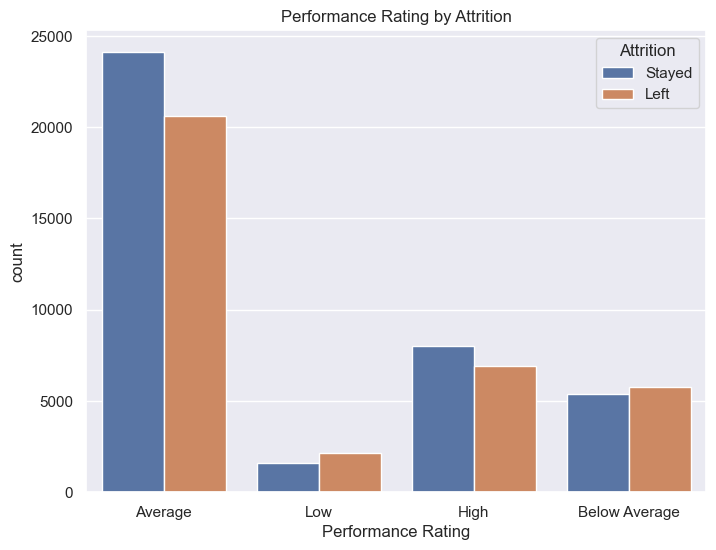

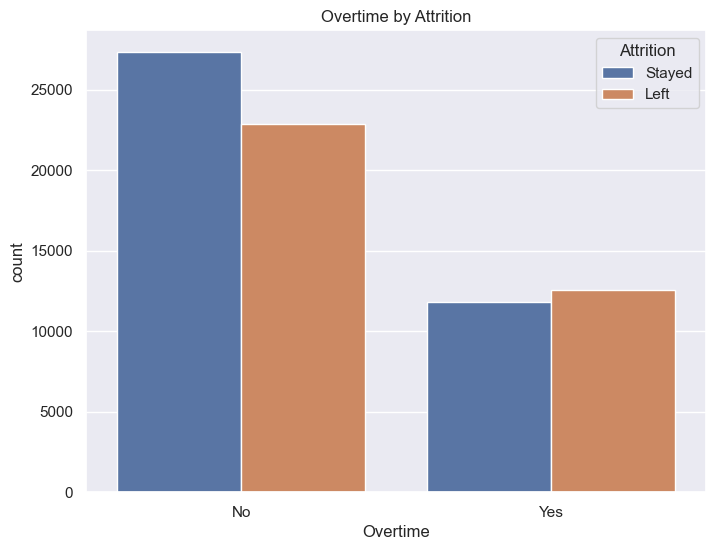

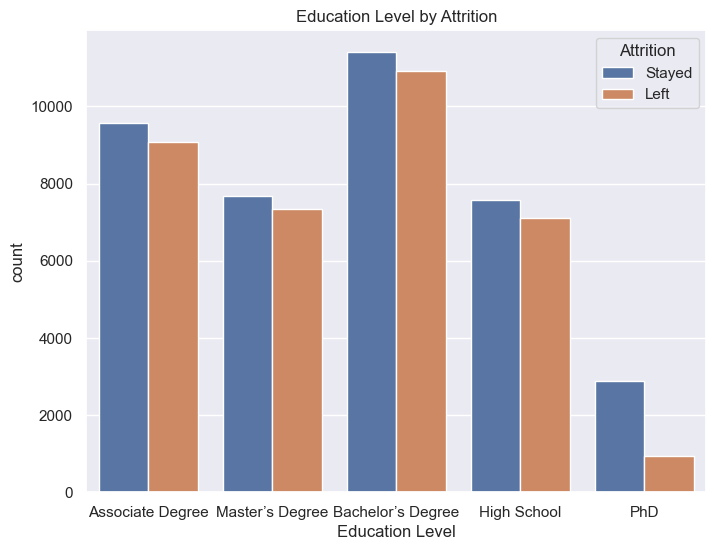

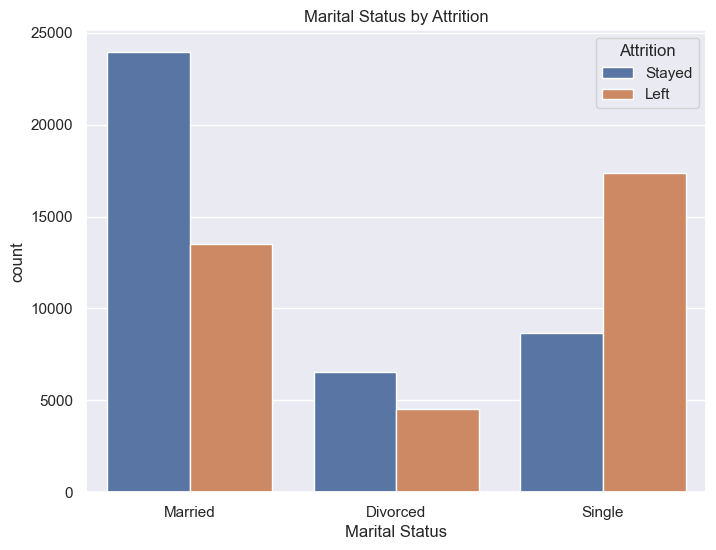

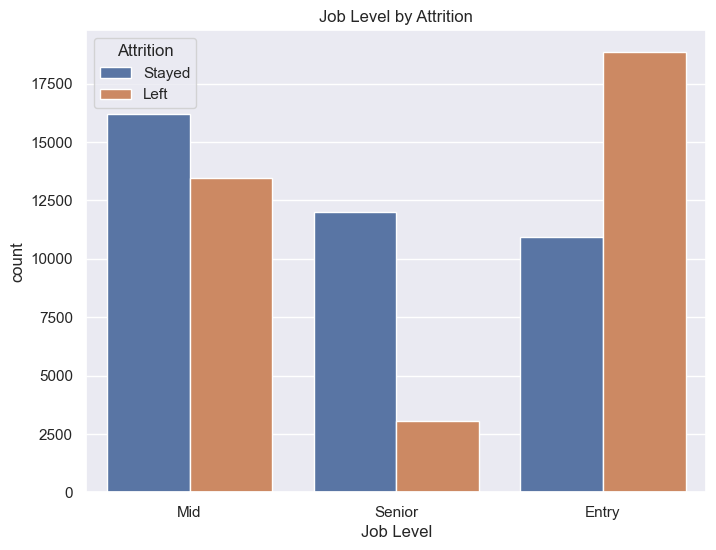

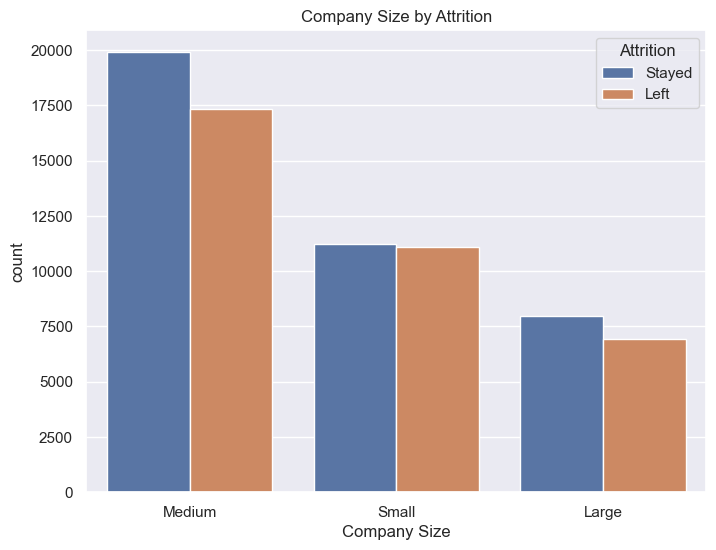

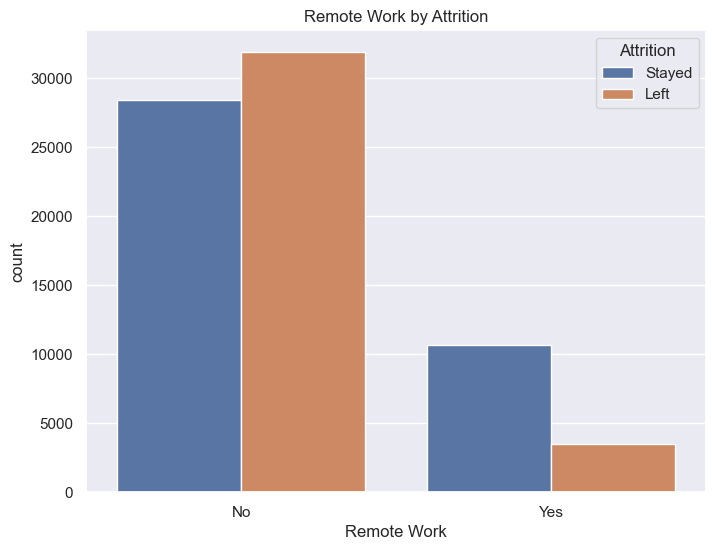

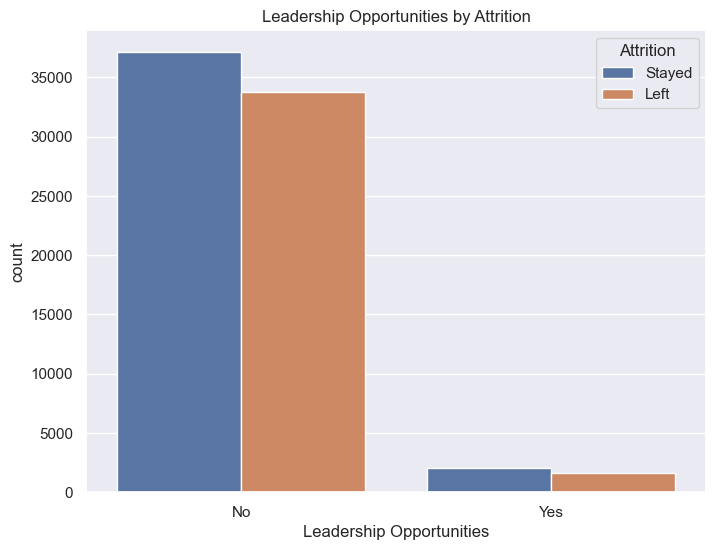

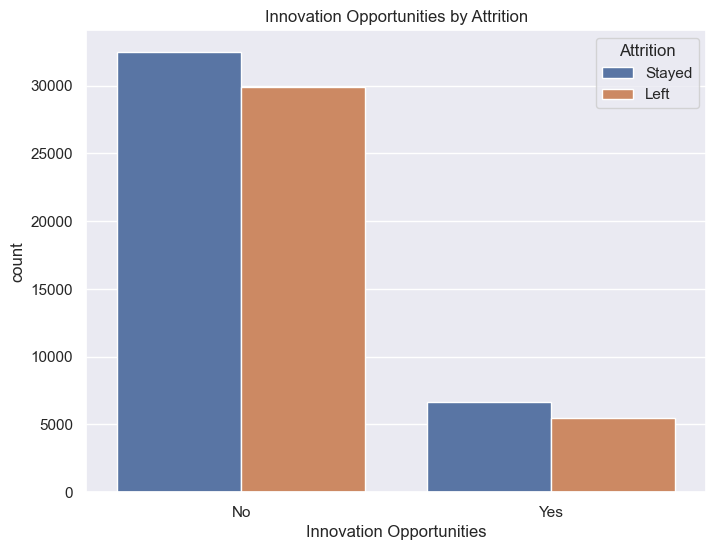

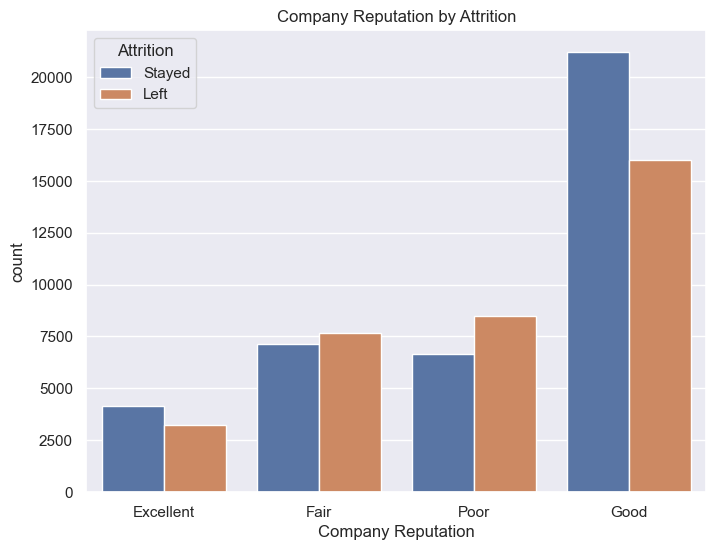

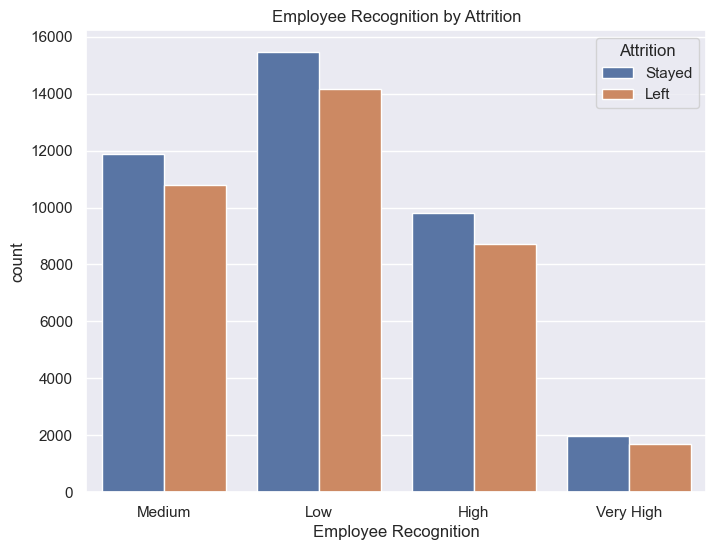

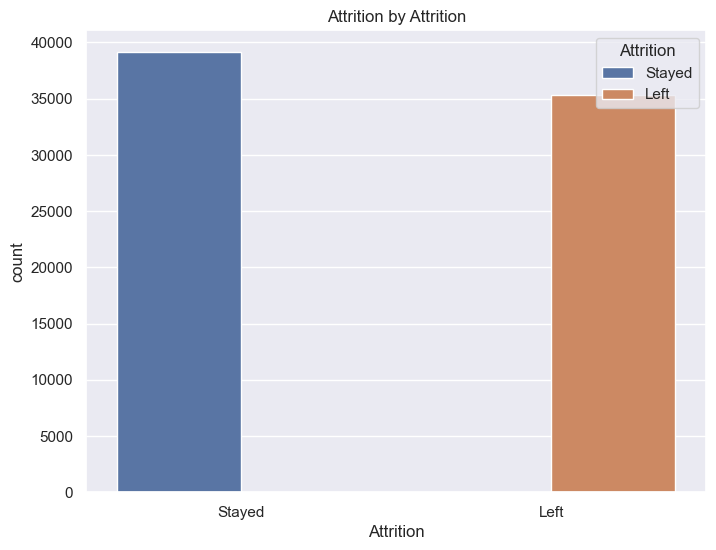

In [47]:
cat_col = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition']

for col in cat_col:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Attrition', data=data)
    plt.title(f'{col} by Attrition')
    plt.show()

In the case of gender males tend to stay more than females. as for job roles most tend to stay but they also leave especially in healthcare and technology.

### Encoding

In [50]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [51]:
le = LabelEncoder()
cat_col = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition']
for col in cat_col:
    data[col] = le.fit_transform(data[col])

### Scaling

In [52]:
scaler = StandardScaler()
num_col = ['Age', 'Years at Company', 'Monthly Income', 'Distance from Home', 'Number of Promotions', 'Number of Dependents', 'Company Tenure']
data[num_col] = scaler.fit_transform(data[num_col])

### Model Building

In [54]:
Features = ['Years at Company','Company Tenure','Monthly Income','Job Level','Remote Work','Gender','Marital Status']

data= data.drop(['Employee ID', 'Age','Job Role',
        'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level',
       'Number of Dependents', 'Company Size',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition'], axis=1)

In [55]:
# train-test split
from sklearn.model_selection import train_test_split

X= data.drop(columns=['Attrition'])
y= data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

models = {
  'Decision Tree': DecisionTreeClassifier(),
  'Random Forest': RandomForestClassifier(),

}
     

In [60]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred1=model.predict(X_train)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred1)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the results
    print(f'{name} Classifier:')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}\n')
     

Decision Tree Classifier:
Precision: 0.6172
Recall: 0.6172
F1 Score: 0.6172

Random Forest Classifier:
Precision: 0.6777
Recall: 0.6775
F1 Score: 0.6775



ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['Left' 'Stayed']